# ST2195_Coursework



##### This coursework will be using years 2005 and 2006, as well as airports/carriers/planedata csvs
##### Please set wd to folder where the coursework dataset and dataverse files are located:
##### os.chdir("~/Desktop/ST2195 Coursework")


In [1]:
import os
os.chdir("/Users/caleb/Desktop/School/Year 1/Programming For Data Science/Coursework/ST2195 Coursework")

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read and load data

In [3]:
airports = pd.read_csv("airports.csv")
carriers = pd.read_csv("carriers.csv")
planedata = pd.read_csv("plane-data.csv")

year2005 = pd.read_csv("2005.csv")
year2006 = pd.read_csv("2006.csv")

### Prepare Data

In [4]:
#Row bind data from 2005 and 2006
flights = pd.concat([year2005, year2006])

#remove cancelled and diverted flights
flights = flights.loc[(flights['Cancelled'] == 0) & (flights['Diverted'] == 0)]

#Keep distinct rows
flights = flights.drop_duplicates()

## Q1: When is the best time of day, day of week, time of year to fly to minimise delays?

### Q1 Part 1: Best Time of Day

#### Establish intervals 

In [5]:
# Convert the departure time to a time of day in hours
flights['DepHour'] = np.floor(flights['CRSDepTime'] / 100)

# Create a new column with the four-hour interval
intervals = pd.cut(flights['DepHour'], bins=[0, 4, 8, 12, 16, 20, 24], right=False)

In [6]:
# Calculate the mean delay for each four-hour interval
delay_by_interval = flights['ArrDelay'].groupby(intervals).mean().reset_index()

# Rename the columns of the result
delay_by_interval.columns = ['Time', 'Avg_Delay']
delay_by_interval['Time'] = ["0000 - 0400","0400 - 0800","0800 - 1200","1200 - 1600","1600 - 2000", "2000 - 2400"]

print(delay_by_interval) #Best time of day is 0400 - 0800

          Time  Avg_Delay
0  0000 - 0400   2.867913
1  0400 - 0800   0.323543
2  0800 - 1200   3.632596
3  1200 - 1600   8.746860
4  1600 - 2000  14.176073
5  2000 - 2400  12.842641


#### Plot the graph

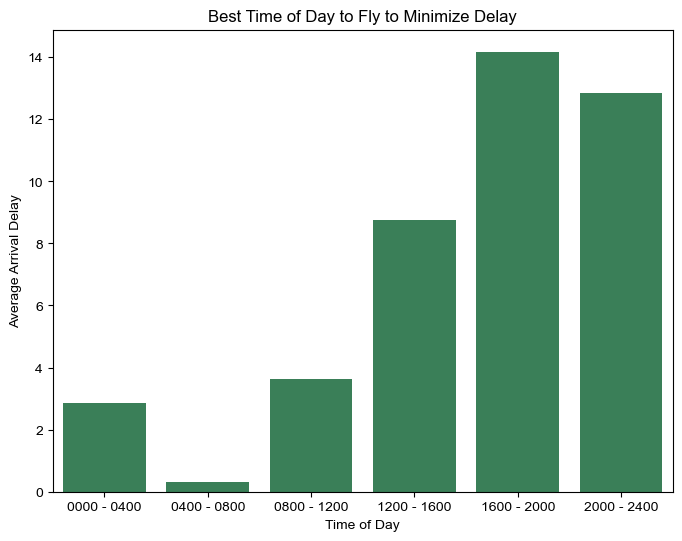

In [7]:
plt.figure(figsize=(8,6))
sns.barplot(x='Time', y='Avg_Delay', data=delay_by_interval, color='seagreen')
plt.xlabel('Time of Day')
plt.ylabel('Average Arrival Delay')
plt.title('Best Time of Day to Fly to Minimize Delay')
sns.set_style("whitegrid")
plt.show()

### Q1 Part 2: Best day of week

#### Calculate mean delay for each day of the week

In [8]:
delay_by_day = flights.groupby('DayOfWeek')['ArrDelay'].mean().reset_index()

#name the columns and rows
delay_by_day.columns = ['Day_of_week', 'Avg_Delay']
delay_by_day['Day_of_week'] = pd.Categorical(delay_by_day['Day_of_week'], categories=[1,2,3,4,5,6,7], ordered = True)
delay_by_day['Day_of_week'].cat.rename_categories(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"], inplace = True)

print(delay_by_day )

  Day_of_week  Avg_Delay
0         Mon   8.351931
1         Tue   5.781012
2         Wed   7.767354
3         Thu  10.624869
4         Fri  10.917909
5         Sat   4.227632
6         Sun   7.305191


/var/folders/8_/27mx48454316tgvpbzqzsxr00000gn/T/ipykernel_46505/2154522212.py:6: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  delay_by_day['Day_of_week'].cat.rename_categories(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"], inplace = True)


#### Plot the graph

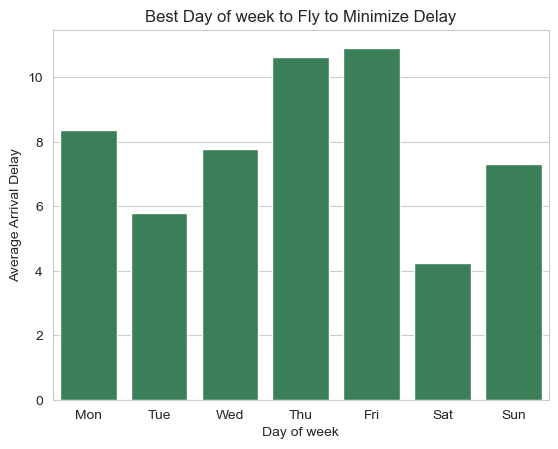

In [9]:
sns.barplot(x='Day_of_week', y='Avg_Delay', data=delay_by_day, color='seagreen')
plt.xlabel('Day of week')
plt.ylabel('Average Arrival Delay')
plt.title('Best Day of week to Fly to Minimize Delay')
plt.show()

### Q1 Part 3: Best time of year

#### Calculate mean delay for each month

In [10]:
delay_by_month = flights.groupby('Month')['ArrDelay'].mean().reset_index()

#name the columns and rows
delay_by_month.columns = ['Month', 'Avg_Delay']
delay_by_month['Month'] = pd.Categorical(delay_by_month['Month'], categories=[1,2,3,4,5,6,7,8,9,10,11,12], ordered=True)
delay_by_month['Month'].cat.rename_categories(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], inplace = True)

print(delay_by_month)

   Month  Avg_Delay
0    Jan   7.830314
1    Feb   6.762661
2    Mar   7.772816
3    Apr   4.495351
4    May   4.941517
5    Jun  10.918843
6    Jul  12.586312
7    Aug   8.839755
8    Sep   5.550076
9    Oct   7.681587
10   Nov   6.238089
11   Dec  11.187479


/var/folders/8_/27mx48454316tgvpbzqzsxr00000gn/T/ipykernel_46505/2730823433.py:6: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  delay_by_month['Month'].cat.rename_categories(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], inplace = True)


#### Plot the graph

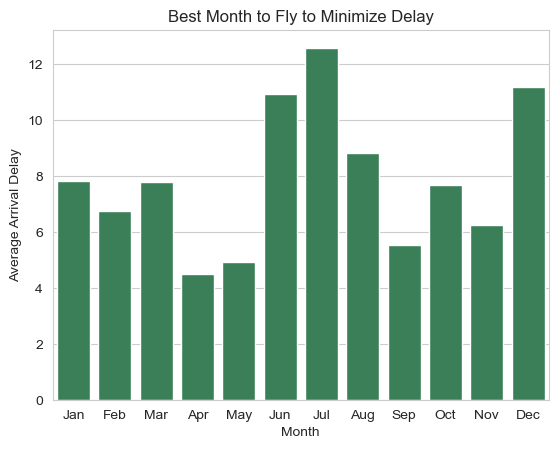

In [11]:
sns.barplot(x='Month', y='Avg_Delay', data=delay_by_month, color='seagreen')
plt.xlabel('Month')
plt.ylabel('Average Arrival Delay')
plt.title('Best Month to Fly to Minimize Delay')
plt.show()

## Q2: Do older planes suffer more delays?

### Prepare the data

In [12]:
# Keep only the columns we need
planedata = planedata[['tailnum', 'year']]

# Rename year in planedata to avoid mistakes with flights['Year']
planedata = planedata.rename(columns={'year': 'Manufactured_Year'})

# Filter out tail numbers that are not in flight data
tailnumbers = flights['TailNum'].unique()
planedata = planedata[planedata['tailnum'].isin(tailnumbers)]

# Remove rows with NAs
planedata = planedata.dropna(subset=['Manufactured_Year'])
planedata = planedata[planedata['Manufactured_Year'].str.match(r'^((?!None|^$|0000)\d{4})$')]
planedata = planedata.loc[planedata['Manufactured_Year'].astype(int) <= 2006]

# Merge with flights data and remove NAs
plane_age = pd.merge(flights, planedata, left_on='TailNum', right_on='tailnum', how='inner')
plane_age = plane_age.dropna(subset=['Manufactured_Year'])

In [13]:
# Calculate age of each plane in years and find the range
plane_age['age_of_plane'] = plane_age['Year'].astype(int) - plane_age['Manufactured_Year'].astype(int)
print("Age range of planes (in years):", plane_age['age_of_plane'].min(), "-", plane_age['age_of_plane'].max())

Age range of planes (in years): 0 - 50


In [14]:
# Arrange the data
plane_age_summary = plane_age[plane_age['ArrDelay'] > 0].groupby('age_of_plane').agg(avg_delay=('ArrDelay', 'mean'), total_flights=('ArrDelay', 'count')).reset_index()
plane_age_summary = plane_age_summary.sort_values('age_of_plane')

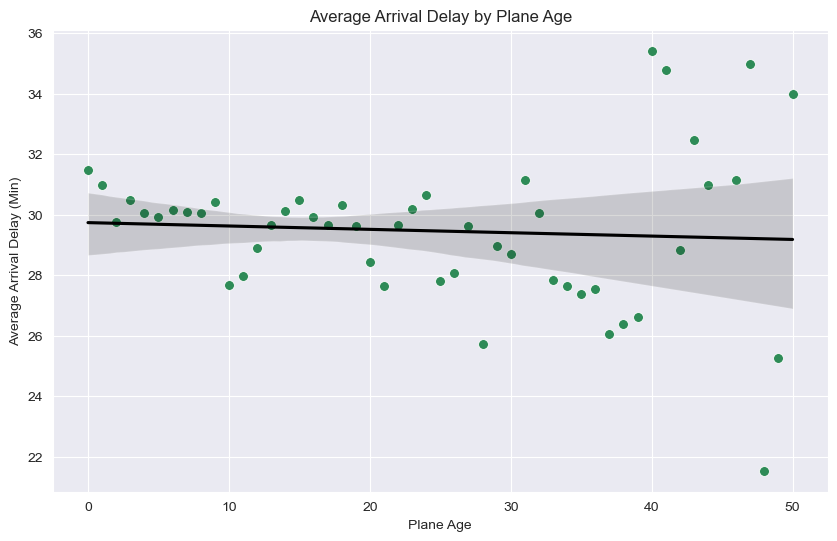

In [15]:
# Plot graph to see an overall view on average delay by plane age
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plane_age_summary, x='age_of_plane', y='avg_delay', color='seagreen', s=50)
sns.regplot(data=plane_age_summary, x='age_of_plane', y='avg_delay', color='black', scatter=False)
plt.title("Average Arrival Delay by Plane Age")
plt.xlabel("Plane Age")
plt.ylabel("Average Arrival Delay (Min)")
plt.show()

#### Since the spread is very big for older planes, we need to check the number of flights between older and newer planes

In [16]:
older_planes = plane_age_summary[plane_age_summary['age_of_plane'] > 25]
print("Total number of flights for older planes:", older_planes['total_flights'].sum())

newer_planes = plane_age_summary[plane_age_summary['age_of_plane'] <= 25]
print("Total number of flights for newer planes:", newer_planes['total_flights'].sum())

Total number of flights for older planes: 147518
Total number of flights for newer planes: 4515433


#### As there are a lot fewer flights from older planes, the results might not be accurate.

#### Thus we use newer_planes to plot another graph as the sample size is larger

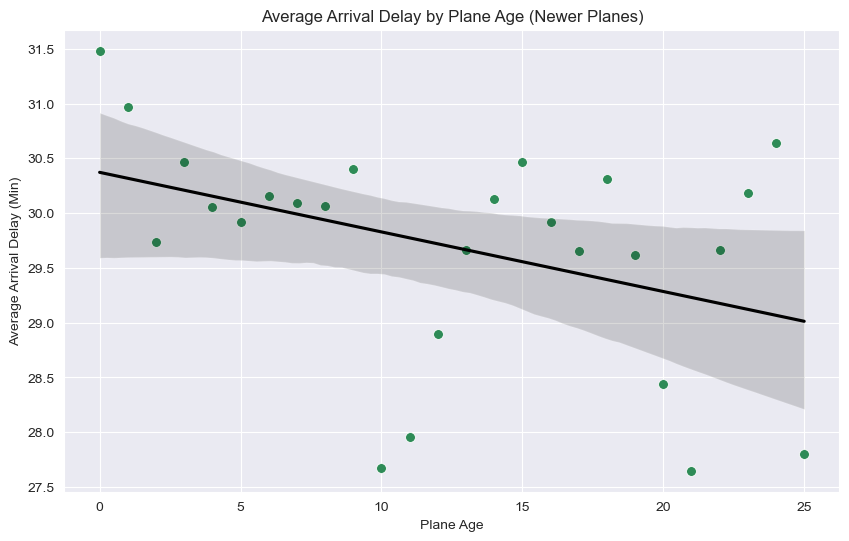

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=newer_planes, x='age_of_plane', y='avg_delay', color='seagreen', s=50)
sns.regplot(data=newer_planes, x='age_of_plane', y='avg_delay', color='black', scatter=False)
plt.title("Average Arrival Delay by Plane Age (Newer Planes)")
plt.xlabel("Plane Age")
plt.ylabel("Average Arrival Delay (Min)")
plt.show()

#### We look at the data frame and see that there is a large increase in flights for planes aged 21 from 20, from less than 21000 for 21 year old planes, to over 70000 for 20 year old planes. Thus, we decide to filter out planes with less than 70000 flights

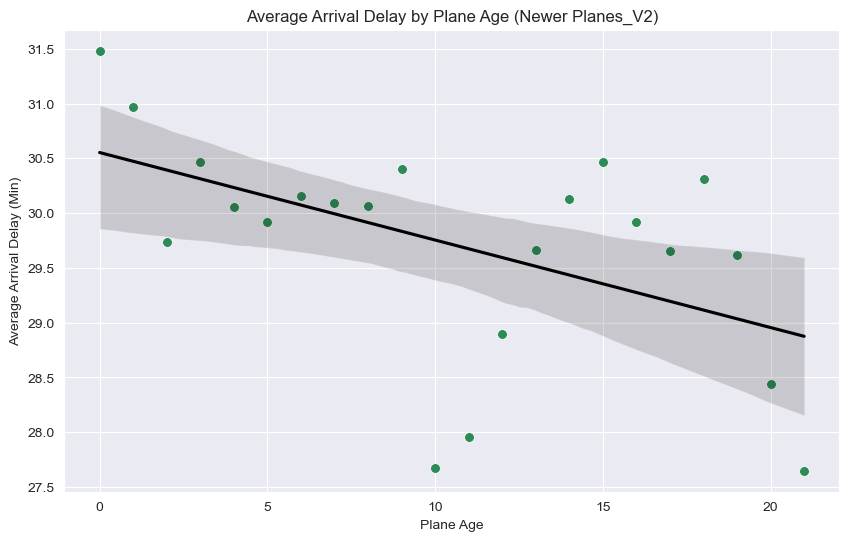

In [18]:
newer_planes_v2 = newer_planes[newer_planes['total_flights'] > 70000]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=newer_planes_v2, x='age_of_plane', y='avg_delay', color='seagreen', s=50)
sns.regplot(data=newer_planes_v2, x='age_of_plane', y='avg_delay', color='black', scatter=False)
plt.title("Average Arrival Delay by Plane Age (Newer Planes_V2)")
plt.xlabel("Plane Age")
plt.ylabel("Average Arrival Delay (Min)")
plt.show()

## Q3: How does the number of people flying between different locations change over time?

### - Since there is no passenger information, we will base this question on the number of flights instead.


#### Getting the routes

In [19]:
# Combine Origin and Destination into Route
flights["Route"] = flights["Origin"] + "-" + flights["Dest"]

In [20]:
# Filter for flights in years 2005 and 2006
flights_0506 = flights[flights["Year"].isin([2005, 2006])]

In [21]:
# Count routes in 2005 and 2006
route_0506 = flights_0506.groupby(["Route", "Year"]).size().reset_index(name="Total_Flights").pivot(index="Route", columns="Year", values="Total_Flights")

In [22]:
# Calculate the difference in flights between 2005 and 2006
route_0506["Difference"] = route_0506[2006] - route_0506[2005]

# Get the top 10 routes with the highest increase in flights
top_routes = route_0506.sort_values(by="Difference", ascending=False).head(10)

# Get the bottom 10 routes with the lowest increase in flights
bottom_routes = route_0506.sort_values(by="Difference").head(10)

In [23]:
# Melt the data frames for visualization
top_routes_melt = pd.melt(top_routes.reset_index(), id_vars=["Route"], value_vars=[2005, 2006], var_name="Year", value_name="Total_Flights")
bottom_routes_melt = pd.melt(bottom_routes.reset_index(), id_vars=["Route"], value_vars=[2005, 2006], var_name="Year", value_name="Total_Flights")

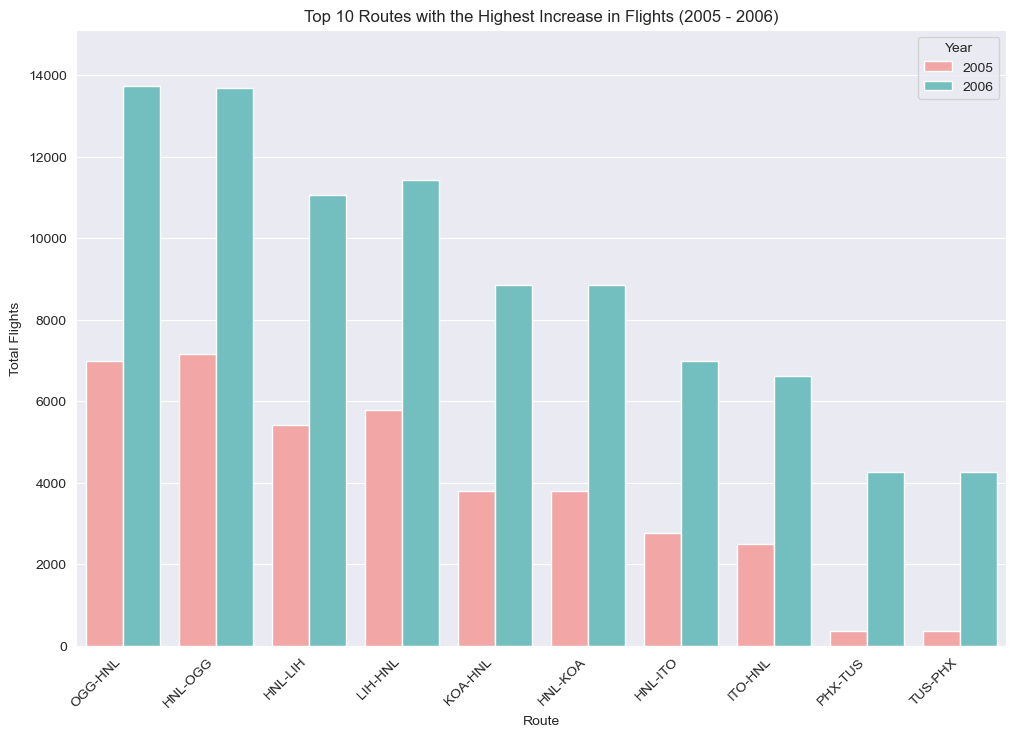

In [24]:
# Visualize the top 10 routes with the highest increase in flights
plt.figure(figsize=(12, 8))
sns.barplot(x="Route", y="Total_Flights", hue="Year", data=top_routes_melt, palette=["#FF9999", "#66CCCC"])
plt.title("Top 10 Routes with the Highest Increase in Flights (2005 - 2006)")
plt.xlabel("Route")
plt.ylabel("Total Flights")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, top_routes_melt["Total_Flights"].max() * 1.1)
plt.show()

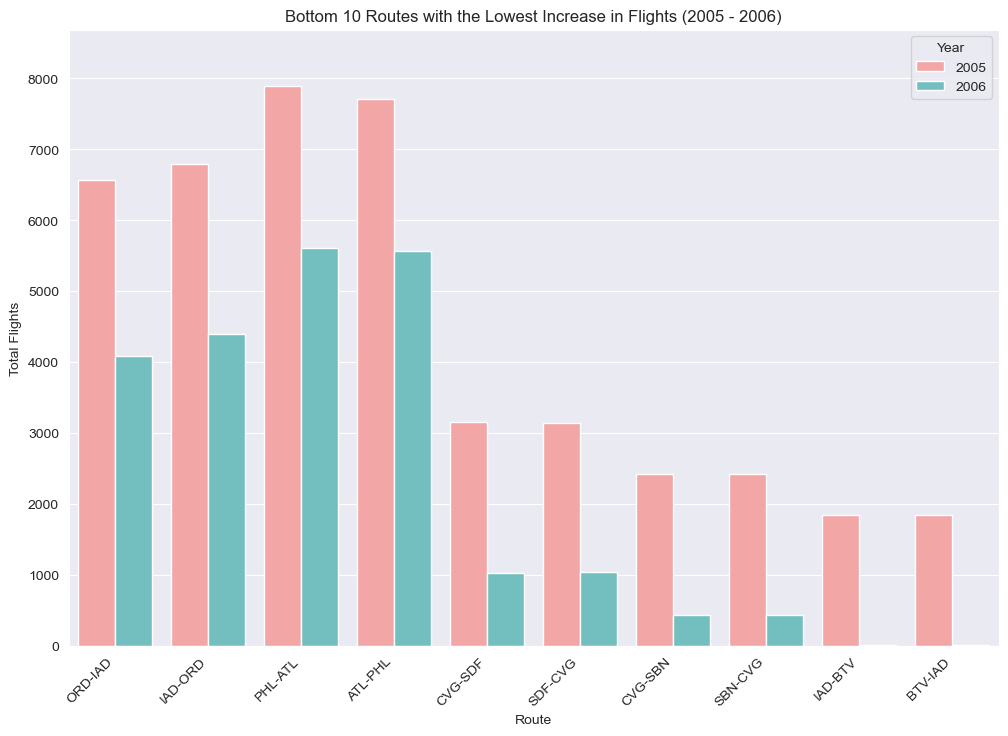

In [25]:
# Visualize the bottom 10 routes with the lowest increase in flights
plt.figure(figsize=(12, 8))
sns.barplot(x="Route", y="Total_Flights", hue="Year", data=bottom_routes_melt, palette=["#FF9999", "#66CCCC"])
plt.title("Bottom 10 Routes with the Lowest Increase in Flights (2005 - 2006)")
plt.xlabel("Route")
plt.ylabel("Total Flights")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, bottom_routes_melt["Total_Flights"].max() * 1.1)
plt.show()

In [26]:
# Check if there was an overall increase in flights from 2005 - 2006
sum_of_route2005 = route_0506[2005].sum()
sum_of_route2006 = route_0506[2006].sum()
sum_of_difference = sum_of_route2006 - sum_of_route2005

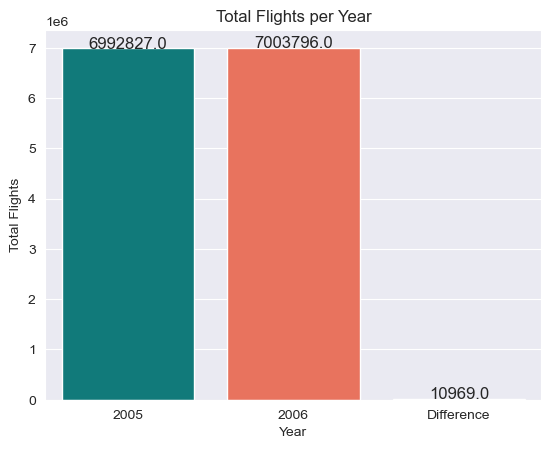

In [27]:
# Create a dataframe with the total flights per year
compare_sums = pd.DataFrame({
    "Year": ["2005", "2006", "Difference"],
    "Total_Flights": [sum_of_route2005, sum_of_route2006, sum_of_difference]
})

# Create a bar plot using seaborn
sns.barplot(x="Year", y="Total_Flights", data=compare_sums, palette=["#008B8B", "#FF6347", "#9ACD32"])
plt.title("Total Flights per Year")
plt.xlabel("Year")
plt.ylabel("Total Flights")
for i in range(len(compare_sums)):
    plt.text(x=i, y=compare_sums["Total_Flights"][i], s=compare_sums["Total_Flights"][i], ha="center", size=12)

plt.show()

## Q4: Can you detect cascading failures as delays in one airport create delays in others?

In [28]:
# merge airport information with existing data frame "plane_age"
cascading_failures = plane_age.merge(airports[['iata', 'airport', 'city']],
                                     left_on='Origin',
                                     right_on='iata', 
                                     how='left').rename(columns={'airport': 'OriginAirport', 'city': 'OriginCity'})

cascading_failures = cascading_failures.merge(airports[['iata', 'airport', 'city']],
                                              left_on='Dest',
                                              right_on='iata',
                                              how='left').rename(columns={'airport': 'DestAirport', 'city': 'DestCity'})

In [29]:
# Calculate the airport with the most flights
most_flights = cascading_failures['Origin'].value_counts().index[0]

In [30]:
# calculate the effect of departure delay in one airport on arrival delay in the airport with the most flights
delay_effect = cascading_failures.loc[cascading_failures['Origin'] == most_flights] \
    .groupby('Dest') \
    .agg(avg_arr_delay=('ArrDelay', 'mean'), 
         avg_dep_delay=('DepDelay', 'mean'), 
         count=('Origin', 'count')) \
    .reset_index() \
    .query('count > 100')

Text(0, 0.5, 'Average Arrival Delay')

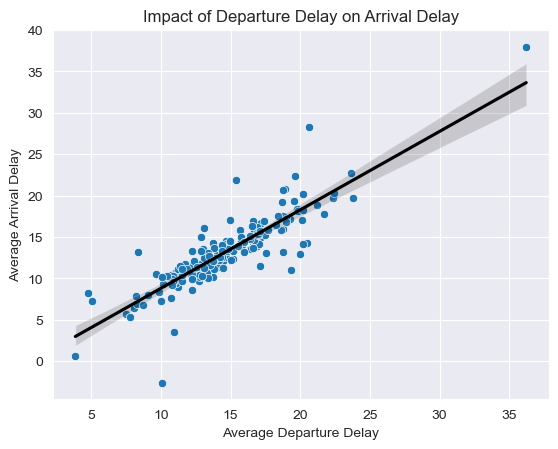

In [31]:
# visualize effect of arrival and departure delay
sns.scatterplot(data=delay_effect, x='avg_dep_delay', y='avg_arr_delay')
sns.regplot(data=delay_effect, x='avg_dep_delay', y='avg_arr_delay', color='black', scatter=False)
plt.title('Impact of Departure Delay on Arrival Delay')
plt.xlabel('Average Departure Delay')
plt.ylabel('Average Arrival Delay')

In [32]:
# calculate the effect of arrival delay on the subsequent departure delay
delay_cascade = cascading_failures.loc[cascading_failures['Dest'].isin(delay_effect['Dest'])] \
    .groupby('Origin') \
    .agg(avg_delay=('ArrDelay', 'mean')) \
    .reset_index()

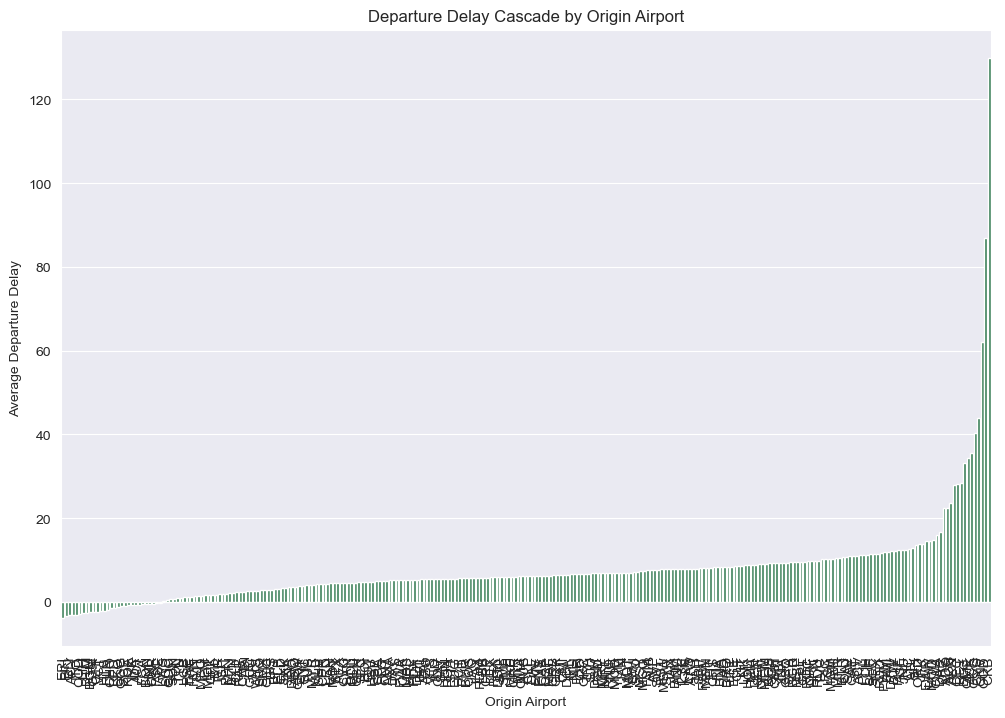

In [33]:
# plot the data to show the average departure delay of flights leaving each airport
plt.figure(figsize=(12, 8))
sns.barplot(data=delay_cascade, x='Origin', y='avg_delay', color='seagreen', order=delay_cascade.groupby("Origin")["avg_delay"].mean().sort_values().index)
plt.title('Departure Delay Cascade by Origin Airport')
plt.xlabel('Origin Airport')
plt.ylabel('Average Departure Delay')
plt.xticks(rotation=90)
plt.show()

## Q5: Use the available variables to construct a model that predicts delays.

In [34]:
from skimpy import skim
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error

In [35]:
# check and read in data
skim(flights)
df = flights[['Year', 'Month', 'DayofMonth', 'CRSDepTime', 'CRSArrTime', 'DepDelay', 'ArrDelay', 'FlightNum', 'Distance']]
df = df.sample(n=100000, random_state=123)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│           Data Summary                 Data Types                                                               │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                        │
│ ┃ dataframe         ┃ Values   ┃ ┃ Column Type ┃ Count ┃                                                        │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                        │
│ │ Number of rows    │ 13996623 │ │ int64       │ 17    │                                                        │
│ │ Number of columns │ 31       │ │ float64     │ 8     │                                                        │
│ └───────────────────┴──────────┘ │ string      │ 6     │                                                        │
│                                  └─────────────┴───────┘                                                        │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA   ┃ NA %   ┃ mean    ┃ sd     ┃ p0      ┃ p25    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Year                     │    0 │      0 │    2000 │    0.5 │    2000 │   2000 │   2000 │   2000 │ █    █  │  │
│ │ Month                    │    0 │      0 │     6.5 │    3.4 │       1 │      4 │      9 │     12 │ ▇████▇  │  │
│ │ DayofMonth               │    0 │      0 │      16 │    8.8 │       1 │      8 │     23 │     31 │ ▇▇▇▇▇█  │  │
│ │ DayOfWeek                │    0 │      0 │     3.9 │      2 │       1 │      2 │      6 │      7 │ ▄▄▄▄▄█  │  │
│ │ DepTime                  │    0 │      0 │    1300 │    480 │       1 │    930 │   1700 │   2900 │   ▇██▃  │  │
│ │ CRSDepTime               │    0 │      0 │    1300 │    460 │       0 │    930 │   1700 │   2400 │  ▄███▃  │  │
│ │ ArrTime                  │    0 │      0 │    1500 │    500 │       1 │   1100 │   1900 │   3000 │   ▄██▅  │  │
│ │ CRSArrTime               │    0 │      0 │    1500 │    480 │       0 │   1100 │   1900 │   2400 │  ▁▇▇█▆  │  │
│ │ FlightNum                │    0 │      0 │    2100 │   1900 │       1 │    580 │   3200 │   9600 │  █▃▂▁▁  │  │
│ │ ActualElapsedTime        │    0 │      0 │     130 │     71 │     -66 │     74 │    160 │   1900 │   █▁    │  │
│ │ CRSElapsedTime           │    0 │      0 │     130 │     70 │     -31 │     75 │    160 │    660 │   ▅█▂   │  │
│ │ AirTime                  │    0 │      0 │     100 │     80 │   -1400 │     54 │    130 │   2000 │     █   │  │
│ │ ArrDelay                 │    0 │      0 │     7.9 │     35 │    -940 │     -9 │     12 │   1900 │    █▂   │  │
│ │ DepDelay                 │    0 │      0 │     9.4 │     32 │   -1200 │     -4 │      8 │   1900 │     █   │  │
│ │ Distance                 │    0 │      0 │     730 │    570 │      11 │    320 │    960 │   5000 │   █▃▁   │  │
│ │ TaxiIn                   │    0 │      0 │     7.5 │     38 │       0 │      4 │      8 │   1500 │    █    │  │
│ │ TaxiOut                  │    0 │      0 │      16 │     11 │       0 │     10 │     18 │   1300 │    █    │  │
│ │ Cancelled                │    0 │      0 │       0 │      0 │       0 │      0 │      0 │      0 │     █   │  │
│ │ Diverted                 │    0 │      0 │       0 │      0 │       0 │      0 │      0 │      0 │     █   │  │
│ │ CarrierDelay             │    0 │      0 │     3.3 │     18 │       0 │      0 │      0 │   1900 │    █    │  │
│ │ WeatherDelay             │    0 │      0 │    0.68 │    8.5 │       0 │      0 │      0 │   1500 │    █    │  │
│ │ NASDelay                 │    0 │      0 │     3.5 │

In [36]:
# create train and test sets
train_set, test_set = train_test_split(df, train_size=0.7, random_state=123)

In [37]:
# define linear regression model
model_linear = LinearRegression()
model_linear.fit(train_set.drop('ArrDelay', axis=1), train_set['ArrDelay'])
pred_linear = model_linear.predict(test_set.drop('ArrDelay', axis=1))
mse_linear = mean_squared_error(test_set['ArrDelay'], pred_linear)

In [38]:
# define ridge regression model
param_grid_ridge = {'alpha': [1], 'solver': ['auto'], 'tol': [0.001], 'max_iter': [1000],
              'fit_intercept': [True], 'random_state': [123],
              'copy_X': [True],
              'positive': [False]}
model_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
model_ridge.fit(train_set.drop('ArrDelay', axis=1), train_set['ArrDelay'])
pred_ridge = model_ridge.predict(test_set.drop('ArrDelay', axis=1))
mse_ridge = mean_squared_error(test_set['ArrDelay'], pred_ridge)

In [39]:
# define random forest model
param_grid = {'n_estimators': [100], 'max_features': [2, 3, 4,5], 'min_samples_split': [2],
              'min_samples_leaf': [1], 'bootstrap': [True], 'criterion': ['squared_error'],
              'random_state': [123]}
model_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
model_rf.fit(train_set.drop('ArrDelay', axis=1), train_set['ArrDelay'])
pred_rf = model_rf.predict(test_set.drop('ArrDelay', axis=1))
mse_rf = mean_squared_error(test_set['ArrDelay'], pred_rf)

In [40]:
# print out MSEs for each model
print("MSE for linear regression:", mse_linear)
print("MSE for ridge regression:", mse_ridge)
print("MSE for random forest:", mse_rf)

# compare MSEs
mse_comparison_df = pd.DataFrame({'MSE': [mse_linear, mse_ridge, mse_rf],
                                  'Model': ['Linear Regression', 'Ridge Regression', 'Random Forest']})

MSE for linear regression: 185.0271285200866
MSE for ridge regression: 185.02712847457528
MSE for random forest: 198.17583244


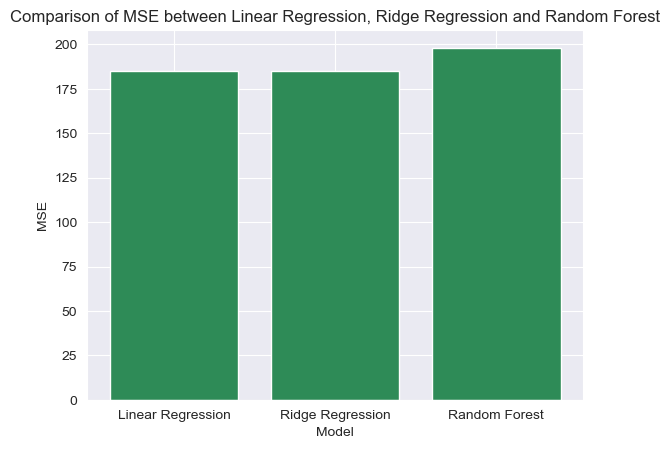

In [41]:
plt.bar(mse_comparison_df['Model'], mse_comparison_df['MSE'], color='seagreen')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Comparison of MSE between Linear Regression, Ridge Regression and Random Forest')
plt.show()